In [ ]:
!pip install sionna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextensi

In [ ]:
!pip install --upgrade --force-reinstall pandas h5py spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense,Lambda,BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
N = 10000
M=64
n_channel=8
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

In [ ]:
data.shape

TensorShape([10000, 64])

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:
import sionna

In [ ]:
from sionna.phy.channel import AWGN
from sionna.phy.utils import ebnodb2no

class Real2ComplexLike(Layer):
    def call(self, x):
        return tf.complex(x, tf.zeros_like(x))
    def compute_output_shape(self, input_shape):
        return input_shape

class Awgn(Layer):
    def __init__(self, no):
        super().__init__()
        self.no = no
        self.awgn = AWGN()

    def call(self, x):
        return self.awgn(x, self.no)

    def compute_output_shape(self, input_shape):
        return input_shape

class RealPart(Layer):
    def call(self, x):
        return tf.cast(tf.math.real(x), tf.float32)
    def compute_output_shape(self, input_shape):
        return input_shape

class FixedPowerNormalization(Layer):
    def __init__(self, target_energy=1.0, eps=1e-12, **kwargs):
        super().__init__(**kwargs)
        self.target_energy = target_energy
        self.eps = eps

    def call(self, x):

        power = tf.reduce_sum(tf.square(x), axis=-1, keepdims=True)
        target_energy = tf.cast(self.target_energy, x.dtype)
        eps = tf.cast(self.eps, x.dtype)
        denom = tf.sqrt(tf.maximum(power, eps))
        scale = tf.sqrt(target_energy) / denom
        return x * scale

class AveragePowerNormalization(Layer):
    def __init__(self, target_energy=1.0, eps=1e-12, **kwargs):
        super().__init__(**kwargs)
        self.target_energy = target_energy
        self.eps = eps

    def call(self, x):
        batch_power = tf.reduce_mean(tf.reduce_sum(tf.square(x), axis=1))  # scalar
        scale = tf.sqrt(self.target_energy / (batch_power + self.eps))
        return x * scale

class Autoencoder(tf.keras.Model):
    def __init__(self, M, n_channel, noise_power):
        super(Autoencoder, self).__init__()
        self.M = M
        self.n_channel = n_channel
        self.noise_power = noise_power
        self.encoder = tf.keras.Sequential([
            Dense(M, activation='relu'),
            Dense(n_channel, activation='linear'),
            #FixedPowerNormalization(target_energy=n_channel),
            AveragePowerNormalization(target_energy=n_channel),
            Real2ComplexLike()
        ])
        self.channel = Awgn(noise_power)
        self.decoder = tf.keras.Sequential([
            Dense(M, activation='relu'),
            Dense(M, activation='softmax')
        ])

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.channel(x)
        x = RealPart()(x)
        x = self.decoder(x)
        return x

In [ ]:
N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

In [ ]:
autoencoder = Autoencoder(M=M, n_channel=n_channel, noise_power=no)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

In [ ]:
M = 16
n_channel = 7
k = int(np.log2(M))
R = k / n_channel
ebno_db = 7.0
no = ebnodb2no(ebno_db, k, R)
no = tf.constant(no, dtype=tf.float32)

N = 10000
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

autoencoder_7_4=Autoencoder(M=16, n_channel=7, noise_power=no)
autoencoder_7_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 2.6364 - val_loss: 2.3555
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2344 - val_loss: 1.8681
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7534 - val_loss: 1.4488
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3775 - val_loss: 1.1220
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0603 - val_loss: 0.8594
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8021 - val_loss: 0.6479
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6044 - val_loss: 0.4730
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4390 - val_loss: 0.3419
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3162 - val_loss: 0.2533
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2355 - val_loss: 0.1890
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1778 - val_loss: 0.1502
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1364 - va

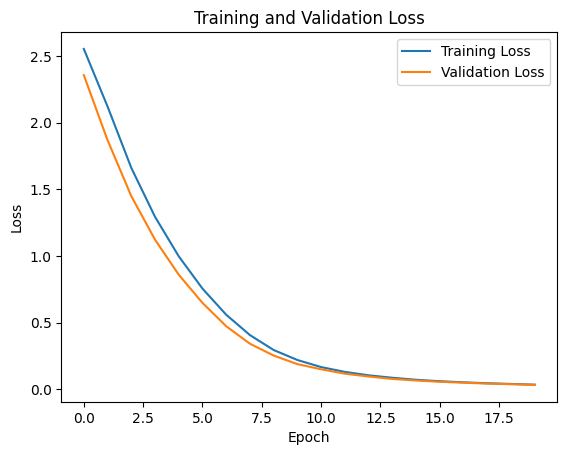

In [ ]:
import matplotlib.pyplot as plt
NUM_EPOCHS = 20 #We might have to increase number of epochs for getting better constellation points
BATCH_SIZE = 300

history = autoencoder_7_4.fit(data, data, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_data, val_data))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
M = 16
n_channel = 2
k = int(np.log2(M))
R = k / n_channel
ebno_db = 7.0
no = ebnodb2no(ebno_db, k, R)
no = tf.constant(no, dtype=tf.float32)

N = 10000
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

autoencoder_2_4=Autoencoder(M,n_channel,no)
autoencoder_2_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0122
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0136
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - val_loss: 0.0108
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - val_loss: 0.0109
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - val_loss: 0.0125
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - val_loss: 0.0115
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - val_lo

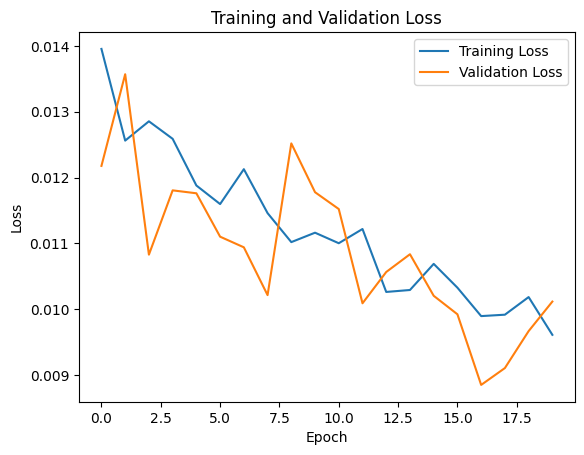

In [ ]:
import matplotlib.pyplot as plt
NUM_EPOCHS = 20 #We might have to increase number of epochs for getting better constellation points
BATCH_SIZE = 300

history = autoencoder_2_4.fit(data, data, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_data, val_data))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
scatter_plot = []
for i in range(0,M):
    temp = np.zeros(M)
    temp[i] = 1
    scatter_plot.append(autoencoder_2_4.encoder.predict(np.expand_dims(temp,axis=0)))
scatter_plot = np.array(scatter_plot)
print (scatter_plot.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(16, 1, 2)


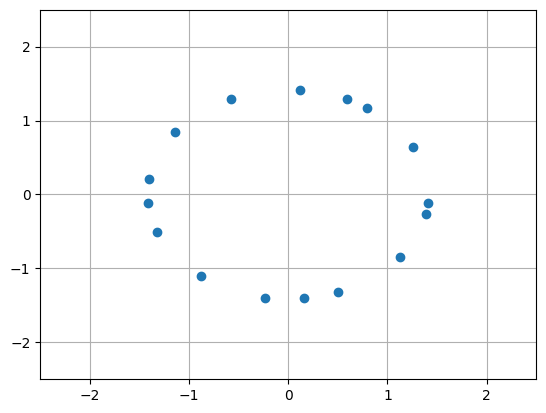

In [ ]:
import matplotlib.pyplot as plt
scatter_plot = scatter_plot.reshape(M,2,1)
plt.scatter(scatter_plot[:,0],scatter_plot[:,1])
plt.axis((-2.5,2.5,-2.5,2.5))
plt.grid()
plt.show()

In [ ]:
M = 4
n_channel = 2
k = int(np.log2(M))
R = k / n_channel
ebno_db = 7.0
no = ebnodb2no(ebno_db, k, R)
no = tf.constant(no, dtype=tf.float32)

N = 10000
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

autoencoder_2_2=Autoencoder(M, n_channel,no)
autoencoder_2_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_lo

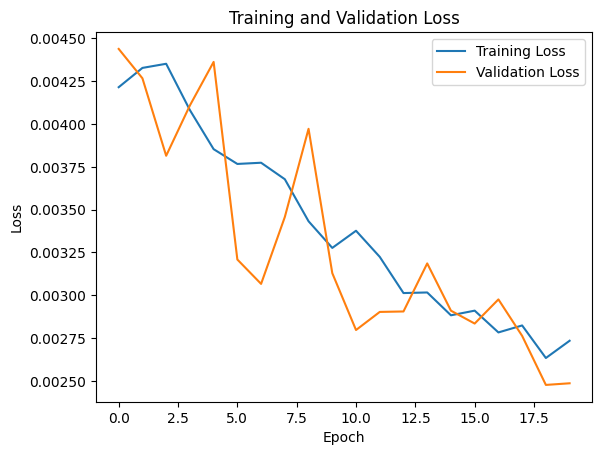

In [ ]:
import matplotlib.pyplot as plt
NUM_EPOCHS = 20 #We might have to increase number of epochs for getting better constellation points
BATCH_SIZE = 300

history = autoencoder_2_2.fit(data, data, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_data, val_data))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
scatter_plot = []
for i in range(0,M):
    temp = np.zeros(M)
    temp[i] = 1
    scatter_plot.append(autoencoder_2_2.encoder.predict(np.expand_dims(temp,axis=0)))
scatter_plot = np.array(scatter_plot)
print (scatter_plot.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(4, 1, 2)


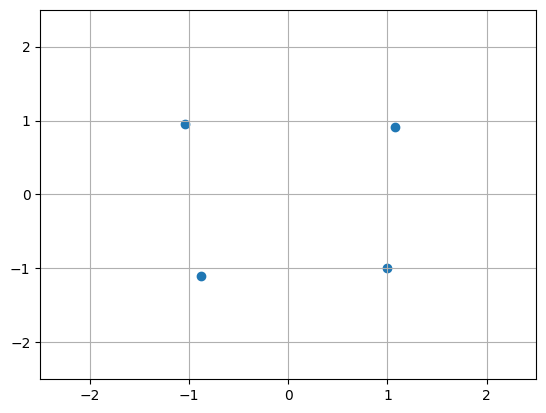

In [ ]:
import matplotlib.pyplot as plt
scatter_plot = scatter_plot.reshape(M,2,1)
plt.scatter(scatter_plot[:,0],scatter_plot[:,1])
plt.axis((-2.5,2.5,-2.5,2.5))
plt.grid()
plt.show()

In [ ]:
M = 64
n_channel = 8
k = int(np.log2(M))
R = k / n_channel
ebno_db = 7.0
no = ebnodb2no(ebno_db, k, R)
no = tf.constant(no, dtype=tf.float32)

N = 10000
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

autoencoder_8_8=Autoencoder(M, n_channel, no)
autoencoder_8_8.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.9493 - val_loss: 3.2733
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0711 - val_loss: 2.5035
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3078 - val_loss: 1.7800
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5990 - val_loss: 1.1459
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9993 - val_loss: 0.6801
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5881 - val_loss: 0.4032
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3523 - val_loss: 0.2554
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2263 - val_loss: 0.1703
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1557 - val_loss: 0.1230
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1147 - val_loss: 0.0944
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0873 - val_loss: 0.0732
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0695 - val_l

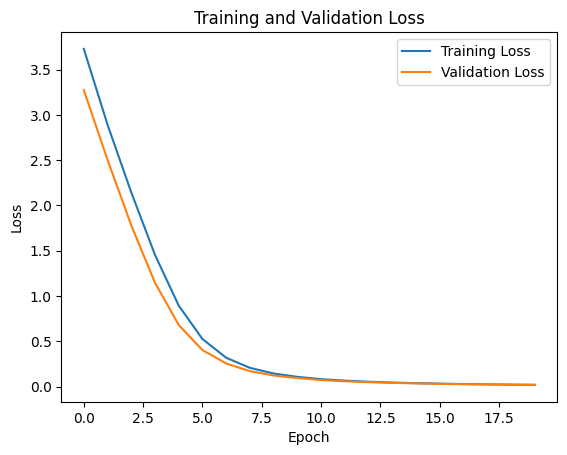

In [ ]:
import matplotlib.pyplot as plt
NUM_EPOCHS = 20 #We might have to increase number of epochs for getting better constellation points
BATCH_SIZE = 300

history = autoencoder_8_8.fit(data, data, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_data, val_data))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#We can use a scatter plot to visualise constellation when n_channel=2
import matplotlib.pyplot as plt

encoded = autoencoder.encoder(val_data)
noisy = autoencoder.channel(encoded)
noisy_real = tf.math.real(noisy).numpy()
plt.scatter(noisy_real[:, 0], noisy_real[:, 1], cmap='viridis')
plt.title('Scatter Plot of Noisy Data')
plt.show()

NameError: name 'autoencoder' is not defined

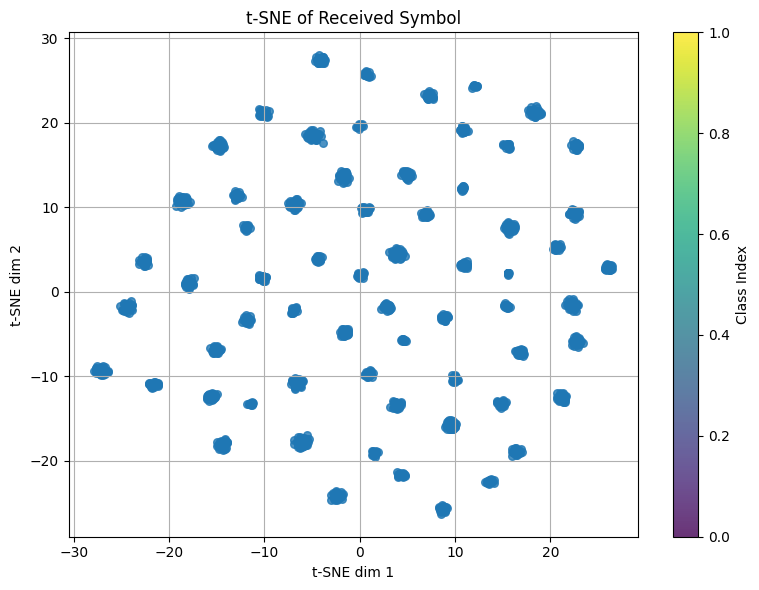

In [ ]:
#We can use t-SNE when n_channel>2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
encoded = autoencoder.encoder(val_data)
noisy = autoencoder.channel(encoded)

noisy_real = tf.math.real(noisy).numpy()

tsne = TSNE(learning_rate=700, n_components=2,max_iter=35000, random_state=0, perplexity=60)
tsne_result = tsne.fit_transform(noisy_real)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                      s=30, alpha=0.8)
plt.title("t-SNE of Received Symbol")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(True)
plt.colorbar(scatter, label='Class Index')
plt.tight_layout()
plt.show()

In [ ]:
def int_to_bits(int_array, n_bits=4):
    return ((int_array[:, None] & (1 << np.arange(n_bits)[::-1])) > 0).astype(np.uint8)

In [ ]:
class mc_fun():

  def __init__(self,autoencoder,M,n_channel):
    self.autoencoder=autoencoder
    self.M=M
    self.n_channel=n_channel
    self.k=int(np.log2(M))
    self.R=self.k/self.n_channel

  def __call__(self, batch_size,ebno_db):
    symbols = np.random.randint(0, self.M, size=batch_size)
    x = tf.one_hot(symbols, depth=self.M)
    no = ebnodb2no(ebno_db, self.k, self.R)
    no = tf.constant(no , dtype=tf.float32)
    self.autoencoder.channel.no = no
    y_hat = self.autoencoder(x, training=False)
    pred = np.argmax(y_hat, axis=1)
    b_true = int_to_bits(symbols,n_bits=self.k)
    b_pred = int_to_bits(pred,n_bits=self.k)
    return b_true, b_pred

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -4.0 | 6.9722e-02 | 1.2778e-01 |         251 |        3600 |          115 |         900 |         0.2 |reached target block errors
     -3.5 | 4.7917e-02 | 8.8333e-02 |         230 |        4800 |          106 |        1200 |         0.1 |reached target block errors
     -3.0 | 4.5167e-02 | 8.4000e-02 |         271 |        6000 |          126 |        1500 |         0.2 |reached target block errors
     -2.5 | 3.0833e-02 | 5.6190e-02 |         259 |        8400 |          118 |        2100 |         0.2 |reached target block errors
     -2.0 | 2.5417e-02 | 4.8333e-02 |         244 |        9600 |          116 |        2400 |         0.3 |reached target block errors
     -1.5 | 1.4583e-02 | 2.9444e-02 |         210 |       14400 |

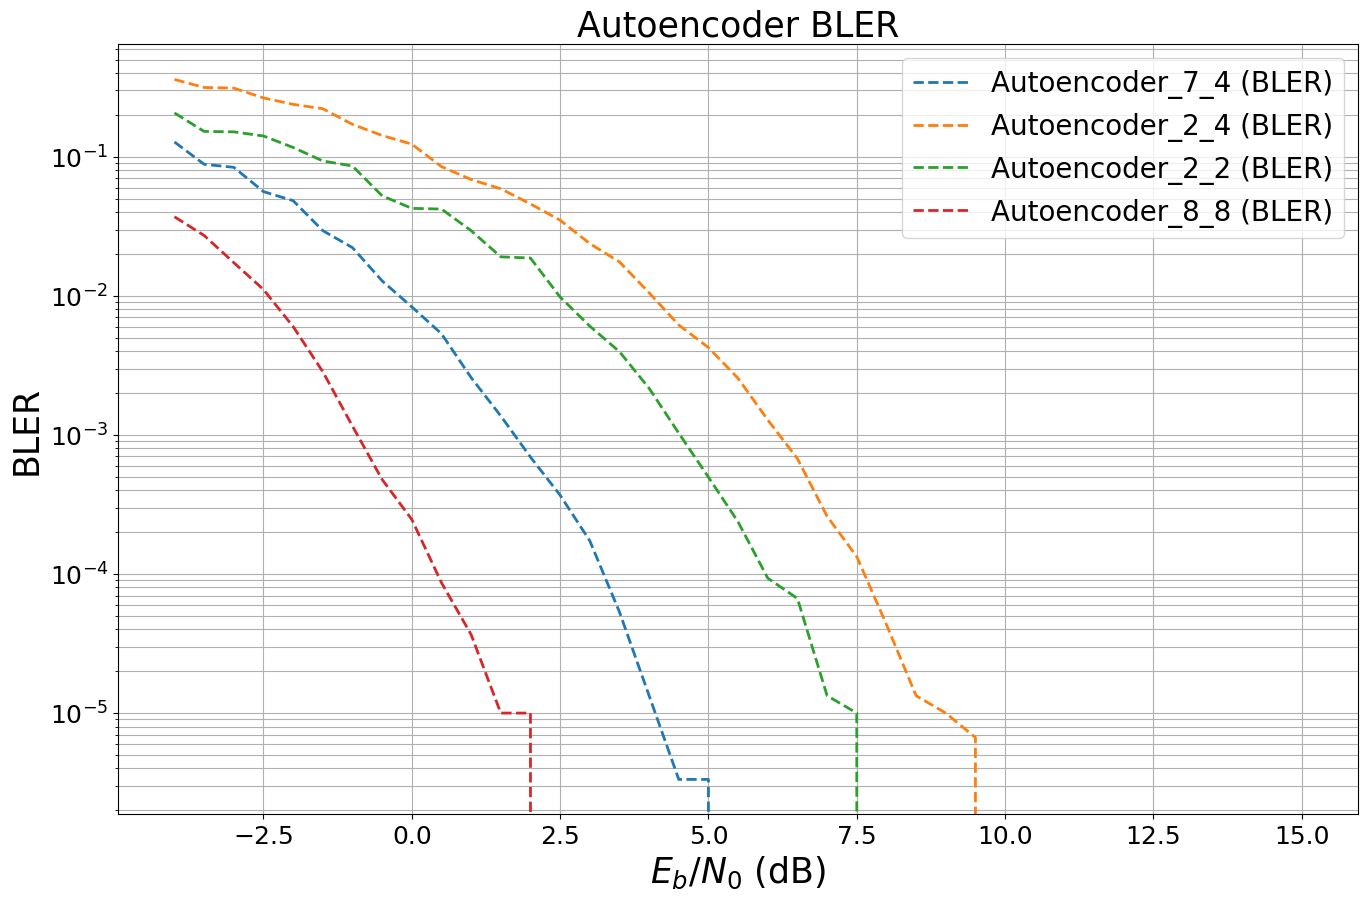

In [ ]:
EbNodB_range = np.arange(-4, 15.5, 0.5)
bler_plot = sionna.phy.utils.PlotBER("Autoencoder BLER")
bler_plot.simulate(
    mc_fun(autoencoder_7_4,16,7),
    ebno_dbs=EbNodB_range,
    batch_size=300,
    num_target_block_errors=100,
    legend="Autoencoder_7_4",
    soft_estimates=False,
    max_mc_iter=1000,
    show_fig=False,
    add_bler=True,
    add_ber=False);
bler_plot.simulate(
    mc_fun(autoencoder_2_4,16,2),
    ebno_dbs=EbNodB_range,
    batch_size=300,
    num_target_block_errors=100,
    legend="Autoencoder_2_4",
    soft_estimates=False,
    max_mc_iter=1000,
    show_fig=False,
    add_bler=True,
    add_ber=False);
bler_plot.simulate(
    mc_fun(autoencoder_2_2,4,2),
    ebno_dbs=EbNodB_range,
    batch_size=300,
    num_target_block_errors=100,
    legend="Autoencoder_2_2",
    soft_estimates=False,
    max_mc_iter=1000,
    show_fig=False,
    add_bler=True,
    add_ber=False);
bler_plot.simulate(
    mc_fun(autoencoder_8_8,64,8),
    ebno_dbs=EbNodB_range,
    batch_size=300,
    num_target_block_errors=100,
    legend="Autoencoder_8_8",
    soft_estimates=False,
    max_mc_iter=1000,
    show_fig=True,
    add_bler=True,
    add_ber=False);